In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [21]:
data=pd.read_excel("Startups.xlsx")
df=pd.DataFrame(data)
df

,Company,Location,Employees,Founded
0,WPExperts,Alexandria,50 - 249,2011
1,Enozom-Software,Alexandria,10 - 49,2012
2,Chudovo,Cairo,50 - 249,2006
3,Blink22,Alexandria,50 - 249,2015
4,modeso,Alexandria,50 - 249,2014
...,...,...,...,...
68,Compeast,Alexandria,10 - 49,2021
69,Networks-Hub,Cairo,10 - 49,2013
70,Oxnary,Giza,10 - 49,2021
71,Valleyware,Cairo,10 - 49,2021


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73 entries, 0 to 72
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Company    73 non-null     object
 1   Location   73 non-null     object
 2   Employees  73 non-null     object
 3   Founded    73 non-null     int64 
dtypes: int64(1), object(3)
memory usage: 2.4+ KB


In [23]:
df.describe()

,Founded
count,73.000000
mean,2012.520548
std,5.188421
min,2000.000000
25%,2010.000000
50%,2012.000000
75%,2016.000000
max,2021.000000


In [24]:
df["Employees"].value_counts()

  10 - 49         42
  50 - 249        21
  2 - 9            7
  250 - 999        2
  2 - 9            1
Name: Employees, dtype: int64

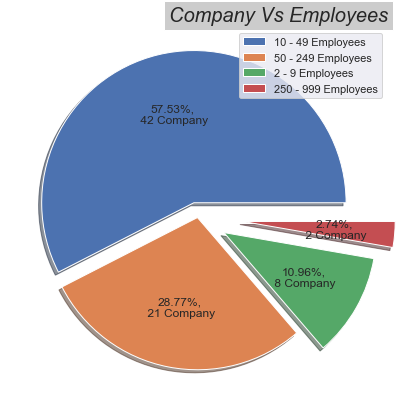

In [25]:
label = ['10 - 49 Employees', '50 - 249 Employees', '2 - 9 Employees',
        '250 - 999 Employees']
 
data = [42,21,8,2]
explode = (0.1, 0.0, 0.2, 0.3)


fig = plt.figure(figsize =(10, 7))
plt.pie(data,explode = explode,shadow=True,autopct=lambda p:f'{p:.2f}%,\n {p*sum(data)/100 :.0f} Company')
plt.title("Company Vs Employees",bbox={'facecolor':'0.8', 'pad':5},fontsize=20,fontstyle='italic',loc="right")
plt.legend( label,loc="upper right")
plt.savefig("Company Vs Employees.png")
plt.show()

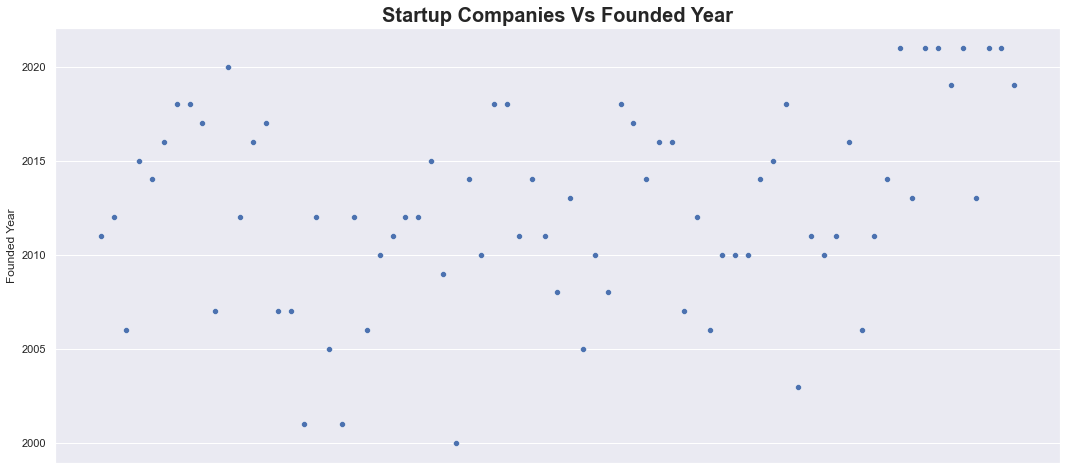

In [26]:
x=df["Founded"]
y=df['Company']
ig = plt.figure(figsize = (18, 8))
splot=sns.scatterplot(x=y,y=x)
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.1f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')
plt.ylabel("Founded Year")
splot.set_title("Startup Companies Vs Founded Year",fontweight ='bold', fontsize = 20)

splot.axes.get_xaxis().set_visible(False)
plt.savefig("Startup Companies Vs Founded Year.png")

sns.set(font_scale = 1)

In [27]:
df1=pd.read_excel("Founded.xlsx")
df11=pd.DataFrame(df1)
df11.head()

,Founded,count
0,2000,1
1,2001,2
2,2003,2
3,2005,2
4,2006,4


C:\Users\abdel\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


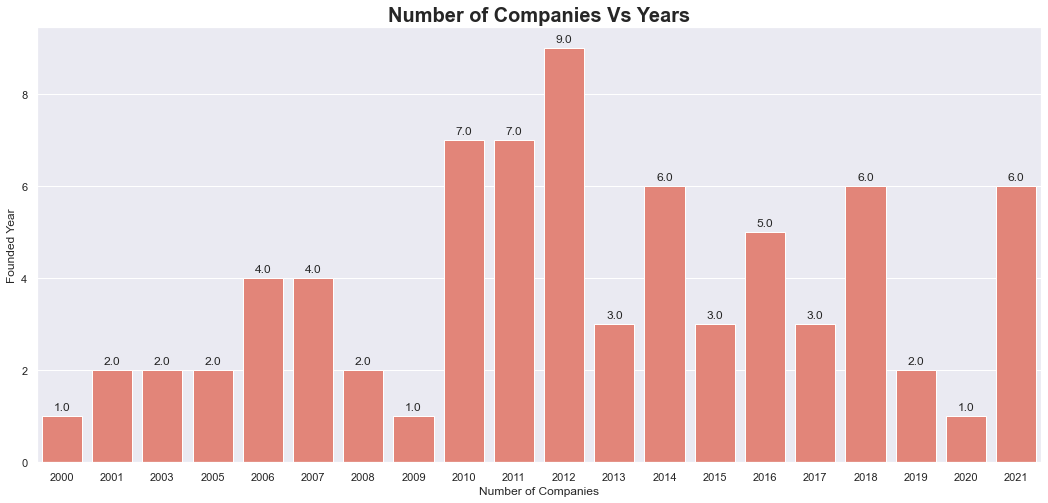

In [28]:
ig = plt.figure(figsize = (18, 8))
splot=sns.barplot(df11["Founded"],df11["count"],color='#F37768')
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.1f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')
plt.ylabel("Founded Year")
plt.xlabel("Number of Companies")
plt.title("Number of Companies Vs Years",fontweight ='bold', fontsize = 20)
plt.savefig("Number of Companies Vs Years.png")
sns.set(font_scale = 1)

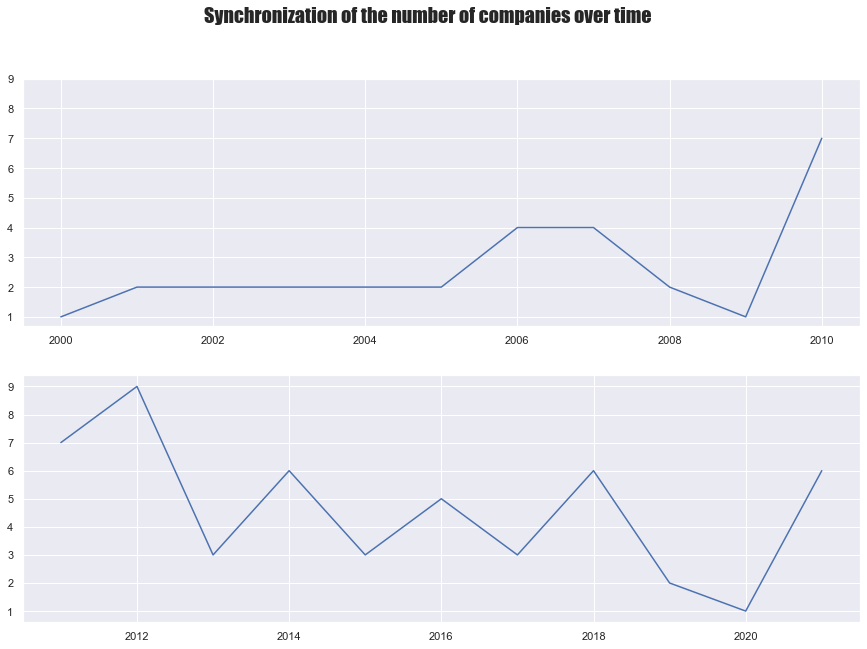

In [29]:
fig, (ax1, ax2) = plt.subplots(2,figsize=(15, 10))
fig.suptitle('Synchronization of the number of companies over time',fontsize=20,family="Impact")
ax1.plot(df11.loc[0:8,"Founded"],df11.loc[0:8,"count"])
ax1.set_yticks(range(1,10))
ax2.plot(df11.loc[9:19,"Founded"],df11.loc[9:19,"count"])
plt.savefig("intervals.png")
plt.show()

In [30]:
daff=pd.read_excel("Book1.xlsx")
data2=pd.DataFrame(daff)

In [31]:
import folium

m = folium.Map(location=[26.599416634038008, 29.79079280451039],
               tiles="OpenStreetMap", zoom_start=6,control_scale=True)

for i in range(0,len(data2)):
   folium.Circle(
      location=[data2.iloc[i]['lat'], data2.iloc[i]['lon']],
      popup=f"{data2.iloc[i]['value']} Company In {data2.iloc[i]['name']}",
      radius=float(data2.iloc[i]['value'])*1000,
      color='crimson',
      fill=True,
      fill_color='crimson'
   ).add_to(m)
m


In [32]:
m.save("Startups Companies map.html")

In [33]:
from folium import plugins
from folium.plugins import HeatMap

heat_map = folium.Map(location=[26.599416634038008, 29.79079280451039],zoom_start = 6,tiles="OpenStreetMap"
                     ,control_scale=True,)

data2['lat'] = data2['lat'].astype(float)
data2['lon'] = data2['lon'].astype(float)


map_values1 = data2[['lat','lon','value']]

data = map_values1.values.tolist()

HeatMap(data,min_opacity=0.5, max_opacity=0.9, radius=25,
                use_local_extrema=False).add_to(heat_map)

heat_map

In [34]:
heat_map.save("Startups Companies HeatMap.html")